In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy import stats

<h2 style="color: green;">Basic - 분포 모형</h2>

+ 정규분포(Normal Distribution) : 대칭적인 종 모양의 분포로, 대부분의 자연 현상에서 나타나는 분포입니다.평균과 표준편차에 따라 모양이 결정됩니다.

+ 이항분포(Binomial Distribution) : 이항 시행에서 성공과 실패의 확률을 나타내며, 성공의 횟수에 대한 분포

+ 포아송분포(Poisson Distribution) : 단위 시간이나 공간에서 발생하는 사건의 수를 나타내는 분포입니다.

+ 지수분포(Exponential Distribution) : 어떤 사건이 발생하는데 걸리는 시간을 나타내는 분포입니다.

<h3 style="color: red;">정규 분포</h3>

정규 분포는 종 모양의 분포이기 때문에 종 분포라고도 합니다. 많은 데이터 세트에 적합하기 때문에 매 우 일반적인 분포입니다.

평균과 분산으로 설명됩니다. 평균은 분포의 중심이고 분산은 분포의 넓이를 측정합니다. 평균 근처에 데이터가 더 많고 평균에서 멀리 떨어진 데이터가 적습니다.

In [3]:
from scipy.stats import norm

In [5]:
#데이터 생성
np.random.seed(12)
height = np.random.normal(loc=170, scale=10, size=100)
weight = np.random.normal(loc=70, scale=5, size=100)
#print(height)
#print(weight)

#데이터 프레임 --> csv 저장
data = pd.DataFrame({'Height' : height, 'Weight' : weight})
data.to_csv("./data/human_data.csv", index=False)
#데이터를 저장할 때 index=false이므로 index값이 없다.
print(data)

        Height     Weight
0   174.729858  63.171801
1   163.185741  64.027778
2   172.424395  70.079673
3   152.992644  69.599783
4   177.531428  68.745986
..         ...        ...
95  160.308235  68.020608
96  178.719681  66.981524
97  155.536406  71.836964
98  164.635187  65.204941
99  171.979205  62.023516

[100 rows x 2 columns]


In [6]:
#생성한 csv 파일을 불러와서 데이터 분포 시각화
#csv 파일 읽기
data = pd.read_csv("./data/human_data.csv")

#키랑 체중 데이터 추출
height_data = data['Height']
weight_data = data['Weight']

print(weight_data)

0     63.171801
1     64.027778
2     70.079673
3     69.599783
4     68.745986
        ...    
95    68.020608
96    66.981524
97    71.836964
98    65.204941
99    62.023516
Name: Weight, Length: 100, dtype: float64


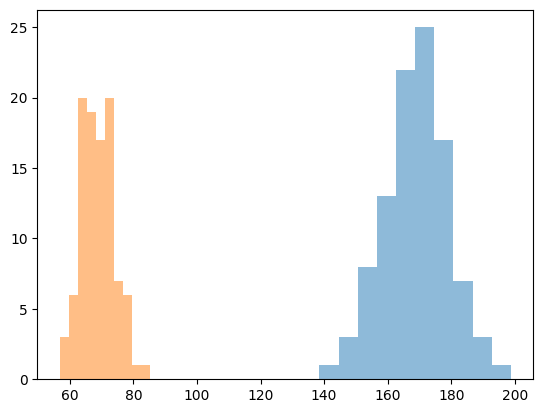

In [7]:
#데이터 분포 시각화
plt.hist(height_data, bins=10, alpha=0.5, label='Height')
plt.hist(weight_data, bins=10, alpha=0.5, label='Weight')
plt.show()

In [9]:
#키에 대한 정규분포 모델링
height_mean, height_std = norm.fit(height_data)
height_x = np.linspace(height_data.min(), height_data.max(), 100)
height_y = norm.pdf(height_x, height_mean, height_std)

#몸무게에 대한 정규분포 모델링
weight_mean, weight_std = norm.fit(weight_data)
weight_x = np.linspace(weight_data.min(), weight_data.max(), 100)
weight_y = norm.pdf(weight_x, weight_mean, weight_std)

#print(height_x, height_y)

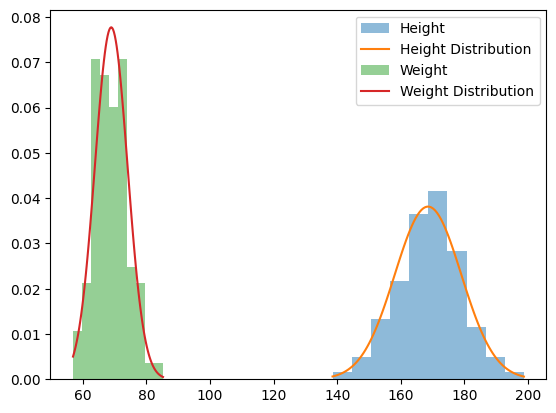

In [10]:
# 모델링 결과 시각화
plt.hist(height, bins=10, density=True, alpha=0.5, label='Height')
plt.plot(height_x, height_y, label='Height Distribution')
plt.hist(weight, bins=10, density=True, alpha=0.5, label='Weight')
plt.plot(weight_x, weight_y, label='Weight Distribution')
plt.legend(loc='upper right')
plt.show()

<h3 style="color: red;">이항 분포</h3>

이항분포는 독립적인 사건이 두 가지 결과만을 가지는 경우에 사용되는 확률분포입니다.

이항분포는 두 개의 파라미터로 정의됩니다. 첫 번째는 각 시행에서 성공하는 확률(p)이고, 두 번째는 시행 횟 수(n)입니다. 동전 던지기의 경우에는 앞면이 나올 확률이 0.5로 고정되어 있으며, 시행 횟수는 동전을 던지는 횟수입니다.

In [11]:
from scipy.stats import binom

In [12]:
#이항 분포 모델링
n = 10 #시행 횟수
p = 0.5  #성공확률
num_simulations = 1000  #시뮬레이션 횟수
successes = np.random.binomial(n, p, num_simulations)

#print(successes)

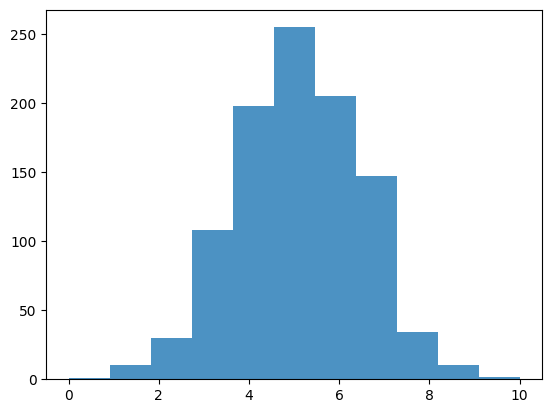

In [13]:
#이항 분포 시뮬레이션 결과 시각화
plt.hist(successes, bins=11, range=(0,10), alpha=0.8)
#bins는 x축 구간의 수
#alpha는 투명도
#range는 히스토그램이 고려할 범위
plt.show()

<h3 style="color: red;">포아송 분포</h3>

특정 시간 또는 공간에서 일어나는 사건의 발생 횟수를 모델링하는데 사용되는 확률분포입니다. 예를 들어 하루 동안 발생하는 이메일 수, 초당 도착하는 트래픽 수, 한 시간 동안 발생하는 사고 수 등과 같은 사건의 발생 횟수를 예측할 때 사용됩니다.

In [14]:
from scipy.stats import poisson

In [15]:
#사건 발생 평균 횟수
lambda_param = 3

#포아송 분포 시뮬레이션
num_simulations = 2000
events = np.random.poisson(lambda_param, num_simulations)
print(events)

[2 3 5 ... 1 0 0]


(array([103., 301., 459., 461., 324., 200.,  96.,  40.,   8.,   8.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

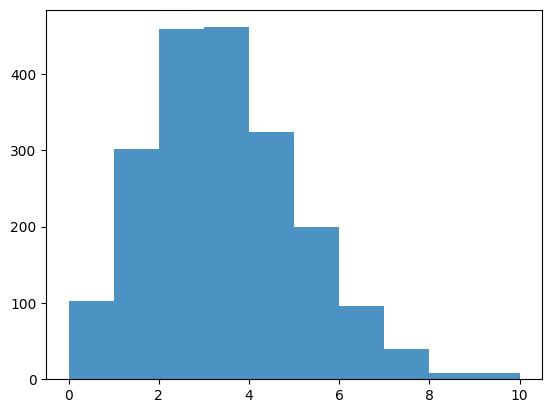

In [16]:
#포아송 분포 시뮬레이션 결과 시각화
plt.hist(events, bins=10, alpha=0.8)

### *지수 분포*

특정한사건이일어나고,그다음에같은사건이다시일어날때까지걸리는시간에대한분포입니 다. 예를 들어 평균적으로 10분마다 도착하는 버스가 있을 때, 버스를 놓친 후 그 다음 버스가 올때 까지기다리는시간은지수분포를따른다고할수있을것입니다.

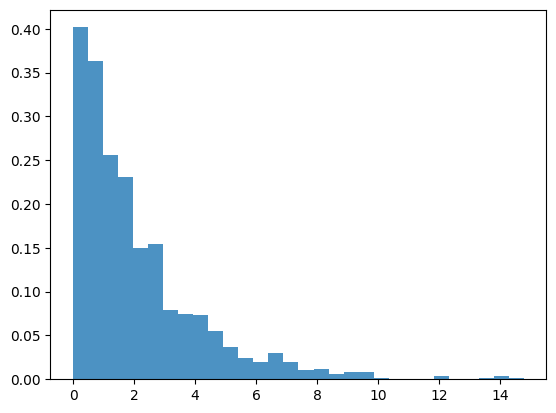

In [17]:
#고객 서비스 센터 대기 시간을 모델링하는 지수분포 생성
def generate_waiting_time(lam, size) :
    data = np.random.exponential(scale=1/lam, size=size)
    return data

#고객 서비스 센터 대기 시간 분포 측정 및 시각화
def measure_waiting_time(lam, num_samples) :
    waiting_times = generate_waiting_time(lam, num_samples)
    
    #대기 시간 분포 히스토그램
    plt.hist(waiting_times, bins=30, density=True, alpha=0.8)
    plt.show()
    
measure_waiting_time(0.5, 1000)

### *감마 분포*

감마분포(Gamma distribution)는 연속 확률분포의 하나로서, 양의 실수 값을 가지는 변수에 대해 사용 됩니다. 감마분포는 다양한 분야에서 활발하게 사용되며, 특히 대기 시간, 수명, 신뢰성 등을 모델링 하는 데에 자주 사용됩니다.

In [18]:
from scipy.stats import gamma

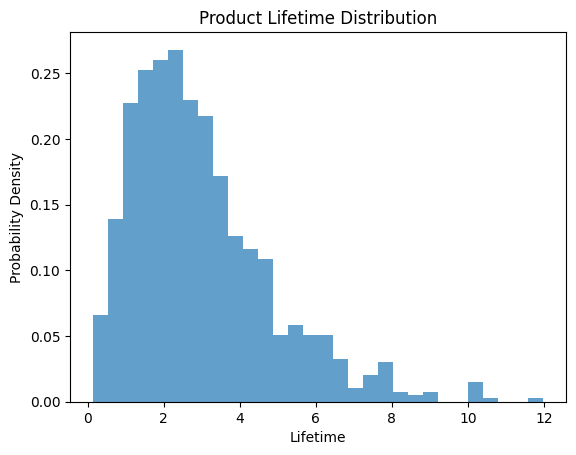

In [20]:
#제품의 고장까지 걸리는 시간을 모델링하는 감마분포 생성함수
def generate_lifetime(alpha, beta, size):
    return np.random.gamma(shape=alpha, scale=beta, size=size)

#제품의 고장까지 걸리는 시간 분포 측정 및 시각화
def measure_lifetime(alpha, beta, num_samples):
    lifetime = generate_lifetime(alpha, beta, num_samples)
    #고장까지 걸리는 시간 분포 히스토그램
    plt.hist(lifetime, bins=30, density=True, alpha=0.7)
    plt.xlabel('Lifetime')
    plt.ylabel('Probability Density')
    plt.title('Product Lifetime Distribution')
    plt.show()
    
#모수 설정
alpha = 2.5
beta = 1.2

#고장까지 걸리는 시간 분포 측정 및 시각화
num_samples = 1000 #생성할 샘플 수
measure_lifetime(alpha, beta, num_samples)

### *베타 분포*

베타분포(Beta distribution)는 0과 1 사이의 값을 가지는 확률 변수를 모델링하는데 사용되는 연속형 확률 분포입니다. 베타분포는 두 개의 모수인 알파(alpha)와 베타(beta)를 가지며, 알파와 베타의 값에 따라 분 포의 형태가 결정됩니다.

In [21]:
from scipy.stats import beta

In [22]:
#모수 설정
alpha = 2
beta = 5

user_data = np.random.beta(alpha, beta, size=1000)
#print(user_data)

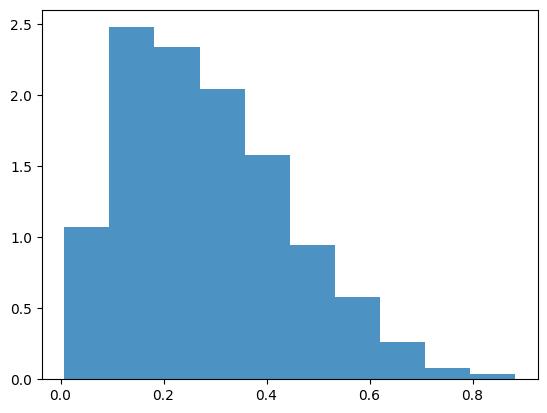

In [23]:
#시각화
plt.hist(user_data, bins=10, density=True, alpha=0.8)
plt.show()

### *카이제곱 분포*

카이제곱 분포는 정규분포를 따르는 독립적인 확률변수들을 제곱하여 합산한 것으로 표현됩니다. 이때 합산하는 정규분포의 개수를 자유도(degree of freedom)라고 합니다. 자유도는 카이제곱 분포의 형태와 특성을 결정하는 중요한 매개변수입니다.

In [27]:
#모순 설정
df = 5 #(자유도)

#카이제곱 분포에서 랜덤 변수 생성
random_variable = np.random.chisquare(df, size=1000)
#print(random_variable)

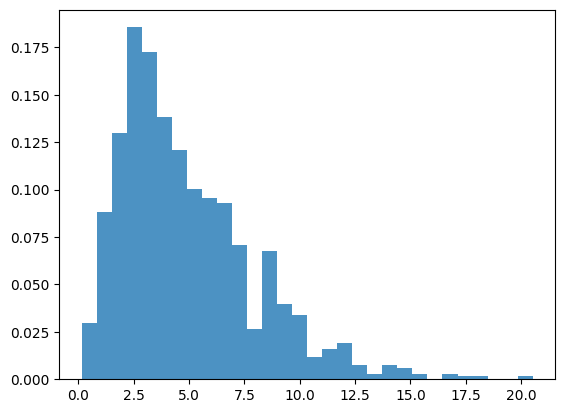

In [26]:
#시각화
plt.hist(random_variable, bins=30, density=True, alpha=0.8)
plt.show()

### *T 분포*

T-분포는 통계학에서 사용되는 확률 분포 중 하나로, 표본 평균의 분포를 나타냅니다. 주로 표본의 크기가 작거나 모집단의 분산이 알려져 있지 않은 경우에 사용됩니다.

In [28]:
from scipy.stats import t

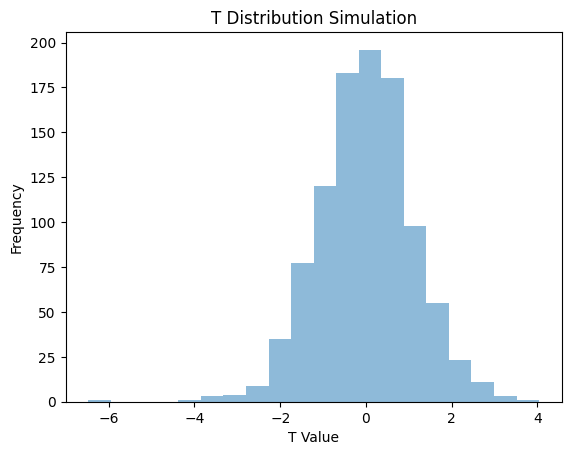

In [29]:
df = 10  #자유도
num_simulations = 1000  #시뮬레이션 횟수
t_values = np.random.standard_t(df, num_simulations)

#시각화
plt.hist(t_values, bins=20, alpha=0.5)
plt.xlabel('T Value')
plt.ylabel('Frequency')
plt.title('T Distribution Simulation')
plt.show()

### *F 분포*

분산비교및분산분석에서사용되는확률분포입니다.두 개 이상의 그룹의 분산이 동일한지를 비교하거나, 회귀 분석에서 모델의 적합도를 평가하는데에 사용됩니다. F-분포는 두 개 이상의 독립적인 카이 제곱 분포를 따르는 랜덤 변수의 비율로 정의됩니다.

In [31]:
#F 분포 모델링
dfn = 5
dfd = 10

#F 분포 시뮬레이션
num_simulations = 1000
f_values = np.random.f(dfn, dfd, num_simulations)
#print(f_values)

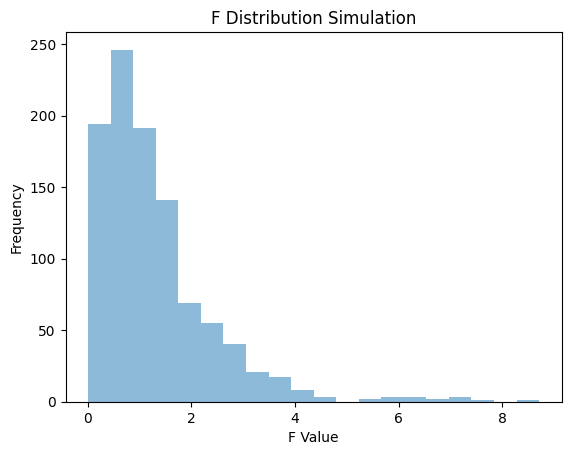

In [32]:
#시각화
plt.hist(f_values, bins=20, alpha=0.5)
plt.xlabel('F Value')
plt.ylabel('Frequency')
plt.title('F Distribution Simulation')
plt.show()